## HDI Groupings

We decided to use PPP for our development groupings. We also considered using HDI to group countries. This is the work that was done for that consideration.

Install openpyxl packages

In [1]:
!pip install openpyxl
!pip install bokeh


[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

In [3]:
df =  pd.read_excel('HDR21-22_Statistical_Annex_HDI_Table.xlsx', 'Table 1', header = 5, skiprows = [6, 7, 74,124, 169], skipfooter = 75)

In [4]:
df.columns

Index(['HDI rank', 'Country', 'Value', 'Unnamed: 3', '(years)', 'Unnamed: 5',
       '(years).1', 'Unnamed: 7', '(years).2', 'Unnamed: 9', '(2017 PPP $)',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

In [5]:
# cleaning DataFrame by removind unnecessay columns
df_HDI22 = df.drop(['Unnamed: 3', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9', 'Unnamed: 11', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',\
'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',\
'Unnamed: 25', 'Unnamed: 26'], axis = 1)

In [6]:
df_HDI22.head()

,HDI rank,Country,Value,(years),(years).1,(years).2,(2017 PPP $),Unnamed: 12
0,1,Switzerland,0.962,83.9872,16.500299,13.85966,66933.00454,5
1,2,Norway,0.961,83.2339,18.185200,13.00363,64660.10622,6
2,3,Iceland,0.959,82.6782,19.163059,13.76717,55782.04981,11
3,4,"Hong Kong, China (SAR)",0.952,85.4734,17.278170,12.22621,62606.84540,6
4,5,Australia,0.951,84.5265,21.054590,12.72682,49238.43335,18


In [7]:
df_HDI22.rename(columns = {'Value': 'HDI', '(years)': 'Life expectancy at birth', 
                           '(years).1':'Expecting years of schooling', 
                           '(years).2': 'Mean years of schooling', 
                           '(2017 PPP $)':'GNI per capita', 
                           'Unnamed: 12':'GNI per capita rank minus HDI rank'}, inplace = True)

In [8]:
df_HDI22.head()

,HDI rank,Country,HDI,Life expectancy at birth,Expecting years of schooling,Mean years of schooling,GNI per capita,GNI per capita rank minus HDI rank
0,1,Switzerland,0.962,83.9872,16.500299,13.85966,66933.00454,5
1,2,Norway,0.961,83.2339,18.185200,13.00363,64660.10622,6
2,3,Iceland,0.959,82.6782,19.163059,13.76717,55782.04981,11
3,4,"Hong Kong, China (SAR)",0.952,85.4734,17.278170,12.22621,62606.84540,6
4,5,Australia,0.951,84.5265,21.054590,12.72682,49238.43335,18


In [9]:
# add HDI group information
df_HDI22['HDI Group'] = 'LOW'
df_HDI22.loc[:, 'HDI Group'][df_HDI22['HDI'] >= 0.8] = 'VERY HIGH'
df_HDI22.loc[:, 'HDI Group'][(df_HDI22['HDI'] >= 0.7) & (df_HDI22['HDI'] < 0.8)] = 'HIGH'
df_HDI22.loc[:, 'HDI Group'][(df_HDI22['HDI'] >= 0.55) & (df_HDI22['HDI'] < 0.7)] = 'MEDIUM'
df_HDI22.sample(10)

/tmp/ipykernel_506/4043088932.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_HDI22.loc[:, 'HDI Group'][df_HDI22['HDI'] >= 0.8] = 'VERY HIGH'
/tmp/ipykernel_506/4043088932.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_HDI22.loc[:, 'HDI Group'][(df_HDI22['HDI'] >= 0.7) & (df_HDI22['HDI'] < 0.8)] = 'HIGH'
/tmp/ipykernel_506/4043088932.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_HDI22.loc[:, 'HDI Group'][(df_HDI

,HDI rank,Country,HDI,Life expectancy at birth,Expecting years of schooling,Mean years of schooling,GNI per capita,GNI per capita rank minus HDI rank,HDI Group
187,188,Central African Republic,0.404,53.8947,8.040172,4.334000,966.058611,1,LOW
68,68,Grenada,0.795,74.9362,18.662020,9.032104,13483.577400,18,HIGH
62,63,Georgia,0.802,71.6940,15.568520,12.822220,14664.168250,17,VERY HIGH
125,126,Nicaragua,0.667,73.8368,12.641358,7.144000,5624.793595,6,MEDIUM
151,152,Kenya,0.575,61.4270,10.698558,6.652000,4473.570344,-6,MEDIUM
37,38,Portugal,0.866,81.0443,16.871229,9.575940,33154.533430,3,VERY HIGH
185,186,Mali,0.428,58.9414,7.423038,2.310000,2132.629443,-11,LOW
15,16,Liechtenstein,0.935,83.2575,15.181570,12.538540,146829.700600,-15,VERY HIGH
19,19,Korea (Republic of),0.925,83.6978,16.521740,12.512930,44500.931870,9,VERY HIGH
180,181,Sierra Leone,0.477,60.0624,9.573391,4.576081,1621.512579,-1,LOW


In [10]:
df2 = pd.read_csv('WDICountry.csv')
df2.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Unnamed: 30
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,NaN,Latin America & Caribbean,High income,AW,...,NaN,Enhanced General Data Dissemination System (e-...,2020 (expected),NaN,NaN,Yes,NaN,NaN,2018.0,NaN
1,AFE,Africa Eastern and Southern,Africa Eastern and Southern,Africa Eastern and Southern,ZH,NaN,"26 countries, stretching from the Red Sea in t...",NaN,NaN,ZH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,The reporting period for national accounts dat...,South Asia,Low income,AF,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0,NaN
3,AFW,Africa Western and Central,Africa Western and Central,Africa Western and Central,ZI,NaN,"22 countries, stretching from the westernmost ...",NaN,NaN,ZI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,The World Bank systematically assesses the app...,Sub-Saharan Africa,Lower middle income,AO,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",NaN,NaN,NaN,2018.0,NaN


In [11]:
DeepnoteChart(df, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"HDI rank","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"nominal","field":"Country","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""")

In [12]:
HDI22 = df_HDI22.merge(df2, how='left', left_on='Country', right_on='Table Name')
HDI22.sample(5)

,HDI rank,Country,HDI,Life expectancy at birth,Expecting years of schooling,Mean years of schooling,GNI per capita,GNI per capita rank minus HDI rank,HDI Group,Country Code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Unnamed: 30
77,78,North Macedonia,0.770,73.8415,13.624432,10.228150,15917.752830,-3,HIGH,MKD,...,Consolidated central government,Special Data Dissemination Standard Plus (SDDS...,2020 (expected),"Multiple Indicator Cluster Survey, 2018/19","Income survey (IS), 2017",Yes,2007,2010.0,2018.0,NaN
39,40,Andorra,0.858,80.3684,13.300239,10.555120,51166.626610,-19,VERY HIGH,AND,...,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2018.0,NaN
49,50,Kuwait,0.831,78.6729,15.324433,7.328023,52919.761370,-32,VERY HIGH,KWT,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,2020 (expected),"Family Health Survey, 1996",NaN,Yes,NaN,2013.0,2018.0,NaN
121,122,Tajikistan,0.685,71.5942,11.653036,11.333394,4547.742427,23,MEDIUM,TJK,...,NaN,Enhanced General Data Dissemination System (e-...,2020 (expected),"Demographic and Health Survey, 2017","Expenditure survey/budget survey (ES/BS), 2015",NaN,2013,NaN,NaN,NaN
170,171,Djibouti,0.509,62.3049,7.432980,4.100000,5024.993944,-32,LOW,DJI,...,NaN,Enhanced General Data Dissemination System (e-...,2020 (expected),"Multiple Indicator Cluster Survey, 2006","Priority survey (PS), 2017",NaN,NaN,NaN,2009.0,NaN


In [13]:
sum(HDI22['Country Code'].isnull())

25

In [14]:
# list of 25 countries of which names in HDI file don't match those of countries in WDI
HDI22['Country'][HDI22['Country Code'].isnull()]

3                  Hong Kong, China (SAR)
19                    Korea (Republic of)
31                                Czechia
44                               Slovakia
54                                Bahamas
74                  Saint Kitts and Nevis
75             Iran (Islamic Republic of)
80                  Moldova (Republic of)
88       Saint Vincent and the Grenadines
96                                  Egypt
105                   Palestine, State of
106                           Saint Lucia
114                              Viet Nam
117      Bolivia (Plurinational State of)
118                            Kyrgyzstan
119    Venezuela (Bolivarian Republic of)
133      Micronesia (Federated States of)
137                 Sao Tome and Principe
139      Lao People's Democratic Republic
143                 Eswatini (Kingdom of)
152                                 Congo
159         Tanzania (United Republic of)
173                                Gambia
178    Congo (Democratic Republic 

In [15]:
# Add three-letter country code to HDI22 DataFrame manually. If you know better way, please let me know
HDI22.iloc[3,9] = 'HKG'
HDI22.iloc[19,9] = 'KOR'
HDI22.iloc[31,9] = 'CZE'
HDI22.iloc[44,9] = 'SVK'
HDI22.iloc[54,9] = 'BHS'
HDI22.iloc[74,9] = 'KNA'
HDI22.iloc[75,9] = 'IRN'
HDI22.iloc[80,9] = 'MDA'
HDI22.iloc[88,9] = 'VCT'
HDI22.iloc[96,9] = 'EGY'
HDI22.iloc[105,9] = 'PSE'
HDI22.iloc[106,9] = 'LCA'
HDI22.iloc[114,9] = 'VNM'
HDI22.iloc[117,9] = 'BOL'
HDI22.iloc[118,9] = 'KGZ'
HDI22.iloc[119,9] = 'VEN'
HDI22.iloc[133,9] = 'FSM'
HDI22.iloc[137,9] = 'STP'
HDI22.iloc[139,9] = 'LAO'
HDI22.iloc[143,9] = 'SWZ'
HDI22.iloc[152,9] = 'COG'
HDI22.iloc[159,9] = 'TZA'
HDI22.iloc[173,9] = 'GMB'
HDI22.iloc[178,9] = 'COD'
HDI22.iloc[182,9] = 'YEM'

In [16]:
income_fig = go.Figure(data=go.Choropleth(
    locations = HDI22['Country Code'],
    z = HDI22['HDI'], # color shading = income group
    text = HDI22['Country'],
    colorscale = 'Greens',
    autocolorscale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    # colorbar_tickprefix = '%',
    colorbar_title = 'Development Group',
))

income_fig.update_layout(
    title_text='Development Groups of Countries', # adding title
    geo=dict(
        showframe=False,
        showcoastlines=False,
    )
)

income_fig.show()

In [17]:
from bokeh.plotting import figure, output_file, save
from IPython.display import IFrame
from IPython.core.display import display, HTML
import tempfile


/tmp/ipykernel_506/1409260849.py:3: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



In [18]:
# function to display Bokeh chart on deepnote (https://deepnote.com/@jz/Bokeh-in-Deepnote-57ac4075-7b17-4932-98ac-413ce3bf36aa)
def bokeh_deepnote_show(plot):
    tmp_output_filename = tempfile.NamedTemporaryFile(suffix='.html').name
    output_file(tmp_output_filename)
    save(plot)

    f = open(tmp_output_filename, "r")
    display(HTML(f.read()))

In [19]:
poly_fit = np.polyfit(HDI22['GNI per capita'], HDI22['Life expectancy at birth'], 1)
poly_1d = np.poly1d(poly_fit)
x = np.linspace(HDI22['GNI per capita'].min(), HDI22['GNI per capita'].max())
y = poly_1d(x)


p = figure(plot_width=600, plot_height=600)
p.circle(HDI22['GNI per capita'], HDI22['Life expectancy at birth'], legend_field = 'HDI Group')
p.line(x, y, color='red')
p.xaxis.axis_label = 'GNI per capita'
p.yaxis.axis_label = 'Life expectancy at birth'

bokeh_deepnote_show(p)

AttributeError: unexpected attribute 'plot_width' to figure, similar attributes are outer_width, width or min_width

In [21]:
HDI22['GNI per capita'].corr(HDI22['Life expectancy at birth'], method = "spearman")

0.850478782033618

In [22]:
poly_fit = np.polyfit(HDI22['GNI per capita'], HDI22['Expecting years of schooling'], 1)
poly_1d = np.poly1d(poly_fit)
x = np.linspace(HDI22['GNI per capita'].min(), HDI22['GNI per capita'].max())
y = poly_1d(x)


p = figure(plot_width=600, plot_height=600)
p.circle(HDI22['GNI per capita'], HDI22['Expecting years of schooling'])
p.line(x, y, color='red')
p.xaxis.axis_label = 'GNI per capita'
p.yaxis.axis_label = 'Expecting years of schooling'

bokeh_deepnote_show(p)

In [22]:
HDI22['GNI per capita'].corr(HDI22['Expecting years of schooling'], method = "spearman")

0.8336869661063654

In [23]:
HDI22.groupby('HDI Group')['GNI per capita rank minus HDI rank'].apply(lambda x: np.average(np.abs(x)))

HDI Group
HIGH         12.673469
LOW           7.468750
MEDIUM       12.227273
VERY HIGH     9.606061
Name: GNI per capita rank minus HDI rank, dtype: float64

In [25]:
HDI22['HDI'].corr(HDI22['GNI per capita rank minus HDI rank'], method = 'spearman')

0.1619208210747995

In [26]:
HDI22_v2 = HDI22.merge(df2, how='left', on='Country Code')
HDI22_v2.sample(10)

,HDI rank,Country,HDI,Life expectancy at birth,Expecting years of schooling,Mean years of schooling,GNI per capita,GNI per capita rank minus HDI rank,HDI Group,Country Code,...,Government Accounting concept_y,IMF data dissemination standard_y,Latest population census_y,Latest household survey_y,Source of most recent Income and expenditure data_y,Vital registration complete_y,Latest agricultural census_y,Latest industrial data_y,Latest trade data_y,Unnamed: 30_y
170,171,Djibouti,0.509,62.3049,7.432980,4.100000,5024.993944,-32,LOW,DJI,...,NaN,Enhanced General Data Dissemination System (e-...,2020 (expected),"Multiple Indicator Cluster Survey, 2006","Priority survey (PS), 2017",NaN,NaN,NaN,2009.0,NaN
75,76,Iran (Islamic Republic of),0.774,73.8749,14.615250,10.636453,13000.711700,15,HIGH,IRN,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,2016,Iran’s Multiple Indicator Demographic and Heal...,"Expenditure survey/budget survey (ES/BS), 2016",Yes,2014,2014.0,2017.0,NaN
113,114,Indonesia,0.705,67.5703,13.748894,8.556510,11466.068360,-11,HIGH,IDN,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2020 (expected),"Demographic and Health Survey, 2017; Indonesia...","Integrated household survey (IHS), 2017",NaN,2013,2013.0,2018.0,NaN
86,87,Brazil,0.754,72.7504,15.599060,8.128814,14369.888480,-5,HIGH,BRA,...,Consolidated central government,Special Data Dissemination Standard Plus (SDDS...,2020 (expected),"National Health Survey, 2013","Integrated household survey (IHS), 2016",Yes,2006,2013.0,2018.0,NaN
179,180,Afghanistan,0.478,61.9824,10.263844,2.985070,1824.190915,-2,LOW,AFG,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0,NaN
50,51,Brunei Darussalam,0.829,74.6424,13.951780,9.180000,64489.539540,-42,VERY HIGH,BRN,...,NaN,Enhanced General Data Dissemination System (e-...,2011,NaN,NaN,Yes,NaN,NaN,2018.0,NaN
122,123,Belize,0.683,70.4697,12.991690,8.847600,6309.099778,6,MEDIUM,BLZ,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2020 (expected),"Multiple Indicator Cluster Survey, 2015/16","Labor force survey (LFS), 1999",NaN,2011,1992.0,2018.0,NaN
138,139,Namibia,0.615,59.2690,11.927207,7.192013,8633.504452,-23,MEDIUM,NAM,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2011,"Demographic and Health Survey, 2013","Expenditure survey/budget survey (ES/BS), 2015",NaN,2013-2014,2013.0,2018.0,NaN
1,2,Norway,0.961,83.2339,18.185200,13.003630,64660.106220,6,VERY HIGH,NOR,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011. Population figures compiled from adminis...,NaN,"Income survey (IS), 2014",Yes,2010,2014.0,2018.0,NaN
29,30,Italy,0.895,82.8502,16.226789,10.740110,42839.514410,0,VERY HIGH,ITA,...,Consolidated central government,Special Data Dissemination Standard Plus (SDDS...,2012. Population figures compiled from adminis...,NaN,"Income survey (IS), 2015",Yes,2010,2014.0,2018.0,NaN


In [27]:
regions = HDI22_v2['Region_y'].unique()
regions

array(['Europe & Central Asia', 'East Asia & Pacific', 'North America',
       'Middle East & North Africa', 'Latin America & Caribbean',
       'Sub-Saharan Africa', 'South Asia'], dtype=object)

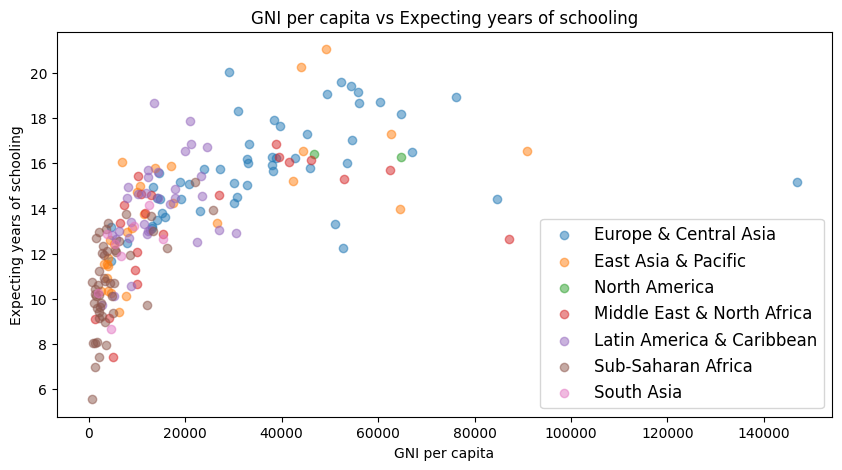

In [28]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111)
for r in regions:
    x = HDI22_v2.loc[HDI22_v2['Region_y'] == r, 'GNI per capita']
    y = HDI22_v2.loc[HDI22_v2['Region_y'] == r, 'Expecting years of schooling']
    ax.scatter(x, y, alpha=0.5, label = r)

ax.set_title('GNI per capita vs Expecting years of schooling')
ax.set_xlabel('GNI per capita')
ax.set_ylabel('Expecting years of schooling')

ax.legend(loc='lower right', fontsize = 12)

In [29]:
incomes = regions = HDI22_v2['Income Group_y'].unique()
incomes

array(['High income', 'Upper middle income', 'Lower middle income', nan,
       'Low income'], dtype=object)

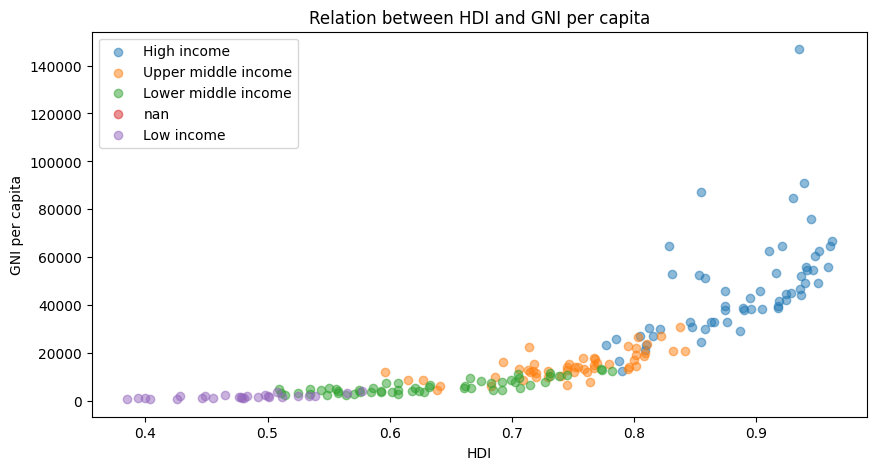

In [30]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111)
for i in incomes:
    x = HDI22_v2.loc[HDI22_v2['Income Group_y'] == i, 'HDI']
    y = HDI22_v2.loc[HDI22_v2['Income Group_y'] == i, 'GNI per capita']
    ax.scatter(x, y, alpha=0.5, label = i)

ax.set_title('Relation between HDI and GNI per capita')
ax.set_xlabel('HDI')
ax.set_ylabel('GNI per capita')

ax.legend(loc='upper left', fontsize = 10)

In [31]:
HDI22_v2[HDI22_v2['Income Group_y'].isnull()]

,HDI rank,Country,HDI,Life expectancy at birth,Expecting years of schooling,Mean years of schooling,GNI per capita,GNI per capita rank minus HDI rank,HDI Group,Country Code,...,Government Accounting concept_y,IMF data dissemination standard_y,Latest population census_y,Latest household survey_y,Source of most recent Income and expenditure data_y,Vital registration complete_y,Latest agricultural census_y,Latest industrial data_y,Latest trade data_y,Unnamed: 30_y
119,120,Venezuela (Bolivarian Republic of),0.691,70.5536,12.81608,11.107277,4810.882621,20,MEDIUM,VEN,...,NaN,Enhanced General Data Dissemination System (e-...,2011,"Multiple Indicator Cluster Survey, 2000","Integrated household survey (IHS), 2015",NaN,2008,1998.0,2013.0,NaN


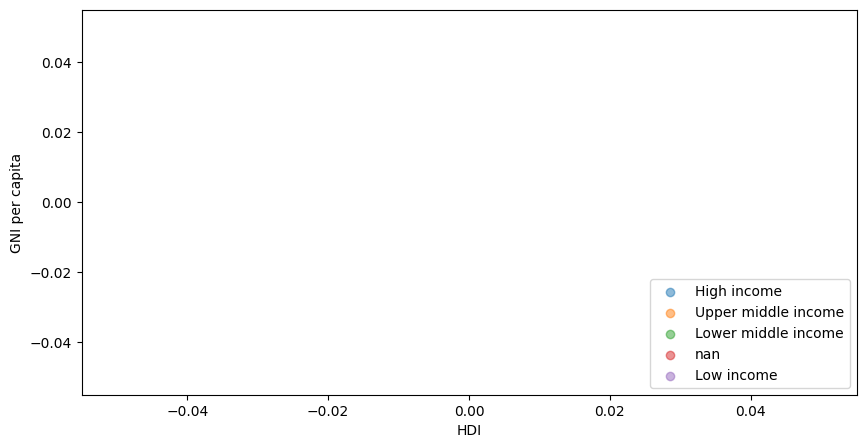

In [32]:
fig1 = plt.figure(figsize = (10, 5))
ax1 = fig1.add_subplot(111)
for i in incomes:
    x = HDI22_v2.loc[HDI22_v2['Region_y'] == i, 'HDI']
    y = HDI22_v2.loc[HDI22_v2['Region_y'] == i, 'GNI per capita']
    ax1.scatter(x, y, alpha=0.5, label = i)

ax1.set_xlabel('HDI')
ax1.set_ylabel('GNI per capita')

ax1.legend(loc='lower right', fontsize = 10)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6e0cd533-862b-451a-ac5c-be06b38b3cd3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>